<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/ARIMA_Model/blob/main/Project_Mark1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Madras-Drinkingwater-level-Prediction**
---







*   ## **Madras Drinkingwater level prediction using Machine learning Algorithms(Time_Series & ARIMA)**






Madras also known as **Chennai** is the capital city of indian state Tamil nadu.Actually due to the vast growth of city from 1893 to 2017 , areas of the surrounding floodplain, along with its lakes and ponds got disappeared which finally leads to the decreement of Chennai's water bodies from 12.6 square kilometers to about 3.2 square kilometers.And faced **water crises** in 2019 and declared "**Day Zero**" by the Chennai city officials on 19th June 2019





---
And by using Machine learning techniques, we can **forecast** future 

availability of **Drinking water** for the Madras city people from the past data


*   The Forecasted data used by the government to fullfill the needs of the people in chennai city regarding water whether there is any chance of occurance of water crises by comparing it with population.
*   With the Forecated data, the government can also evacuate the people of chennai city.





> Indented block



---
* ## **Dataset Description**
---













1.   To build a model, we need dataset which consists of past data and is only source for a **machine learning** to fed and predict the future estimations.And in particular for this project, we have considered 4 data sets to get clear insight of Chennai city **water crises** and fed to the model to predict.

  *   **Chennai Reservoir levels** : There were actually **4 main reservoirs** for the people of chennai to fullfill their daily needs as source and named as **POONDI, CHOLAVARAM, REDHILLS, CHEMBARAMBAKKAM**. And the data set consists of availability of water in them from 2004 to 2019 (day-by-day).

  *   **Chennai Reservoir Rainfall** : Amount of rainfall water is the souce for the above 4 reservior and the data set consists of water in **MCFT(Million Cubic Feet)** as souce.
    *  **Final Reservior** : It is the souce for the people of chennai to use water and the data set named Final Reservior consists of water with the combination of 4 reserviors in MCFT(Million Cubic Feet) to fullfill daily needs of people in chennai(2014-2019).

  *   **Final Rainfall** : And the source for the Final Resrvior other than above mentioned 4 reserviors is Rain water (Rainfall) and as taken as dataset consists of rainfall water inflow for final Reservior(2004-2019).

2. The ML model is to be fitted on the Final Reservior data as mentioned above to predict the final value of water in MCFT(Million Cubic Feet) for people living in chennai city and other datasets are used to explore the influencing factors of the final value and to get insight about total forecsting technique.










*   ## **Importing Libraries and Dataset**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
chennai_reservoir_levels = pd.read_csv("chennai_reservoir_levels.csv.csv",)
chennai_reservoir_rainfall = pd.read_csv("chennai_reservoir_rainfall.csv")
final_Reservior = pd.read_csv("final_Reservior.csv")
final_rainfall = pd.read_csv("final_rainfall.csv")


In [ ]:
chennai_reservoir_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [ ]:
chennai_reservoir_rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [ ]:
final_Reservior.head()

,Date,Total
0,01-01-2004,271.9
1,01-02-2004,271.9
2,01-03-2004,270.9
3,01-04-2004,270.9
4,01-05-2004,270.8


In [ ]:
final_rainfall.head()

,Date,Total
0,01-01-2004,0.0
1,02-01-2004,0.0
2,03-01-2004,0.0
3,04-01-2004,0.0
4,05-01-2004,0.0


In [ ]:

final_Reservior.tail()

,Date,Total
5733,09-12-2019,15.0
5734,13-09-2019,15.0
5735,14-09-2019,15.0
5736,15-09-2019,15.0
5737,16-09-2019,15.0


In [ ]:
daa = final_rainfall.iloc[5737,0]
daa = daa.split("-")
print(daa)

['16', '09', '2019']


Thus by using head method, we can look the sample of the data and the data of final_Reservior's column Total is need to be forcasted. 



---
*   ## **Data Pre-Processing**


---






*   Actually the term **Data Pre-Processing** is the technique of preparing **(cleaning and organizing)** the raw data to make it suitable for a building and training Machine Learning models.
*   After observing the data, the data is of **Time series** data and the technique named Time Series Analysis and related model is used to fit on the data set



In [ ]:
chennai_reservoir_levels["Date"] = pd.to_datetime(chennai_reservoir_levels["Date"])
chennai_reservoir_levels.set_index('Date',inplace=True)

In [ ]:
chennai_reservoir_rainfall["Date"] = pd.to_datetime(chennai_reservoir_rainfall["Date"])
chennai_reservoir_rainfall.set_index('Date',inplace=True)

In [ ]:
final_rainfall["Date"] = pd.to_datetime(final_rainfall["Date"])
final_rainfall.set_index('Date',inplace=True)

In [ ]:
final_Reservior["Date"] = pd.to_datetime(final_Reservior["Date"])
final_Reservior.set_index('Date',inplace=True)

From the above code , we are converting Date column from string/Other datatype to the Datetimeindex to do the operations of the time series efficiently on it.

In [ ]:
final_Reservior.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5738 entries, 2004-01-01 to 2019-09-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   5738 non-null   float64
dtypes: float64(1)
memory usage: 89.7 KB


In [ ]:
final_Reservior.isnull().sum()

Total    0
dtype: int64

From the it is confirmed that there are no null values in the above data. so, no need to fill the any null values using ffill(forward fill) or bfill(backward fill) in time series data using time series techniques.



---

*   ## **Data visualization / Preliminary visualization**

---







*   Actullay for a machine learning model to work efficiently with best accuracy result, a huge data in a dataset is the first and most important and clear insight of the dataset is must and should for a programmer/ designer of an **ML model**.
*   To explore the huge data set by manually is not possible . so the concept of **data visualization** is introduced and through we can explore the data set in pictorial format of different types with the help of python libraries.






*   ### **Exploring contribution of 4 Reserviors(POONDI, CHOLAVARAM, REDHILLS,	CHEMBARAMBAKKAM)**

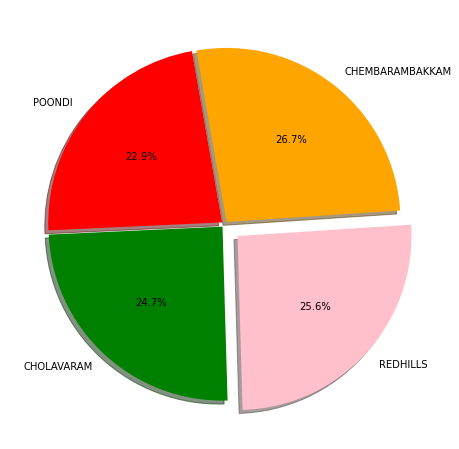

In [ ]:
poondi = pd.Series(chennai_reservoir_rainfall["POONDI"])
cholavaram = pd.Series(chennai_reservoir_rainfall["CHOLAVARAM"])
redhills = pd.Series(chennai_reservoir_rainfall["REDHILLS"])
chembarakkam = pd.Series(chennai_reservoir_rainfall["CHEMBARAMBAKKAM"])
labels=["POONDI", "CHOLAVARAM", "REDHILLS", "CHEMBARAMBAKKAM"]
dat = [poondi[:].mean(),cholavaram[:].mean(),redhills[:].mean(),chembarakkam[:].mean()]
plt.pie(dat,labels=labels,autopct='%1.1f%%',shadow=True,startangle=100,explode=(0.018, 0.018, 0.1, 0.018),colors=["red","green","pink","orange"])
plt.show()


*   ### **Trends in reservior from 2004 to 2019 (4 Reserviors)**



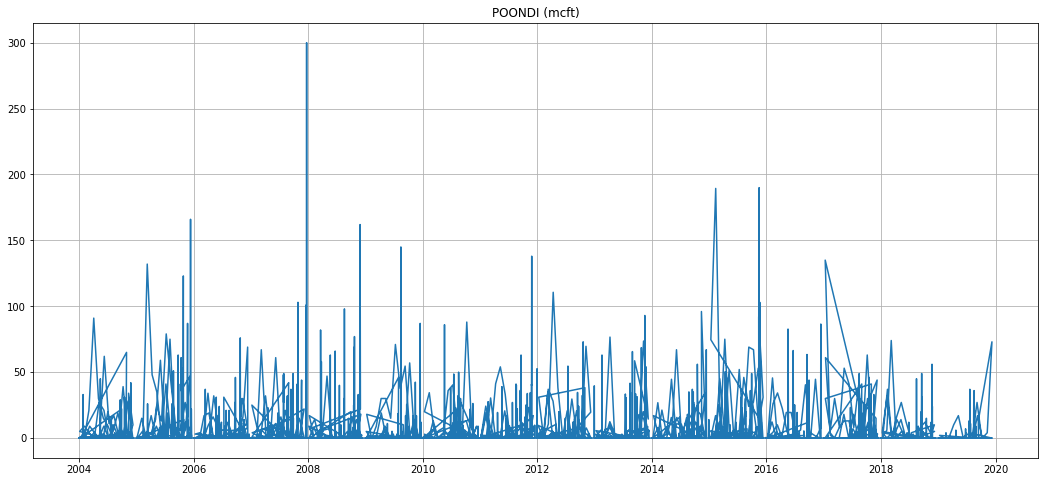

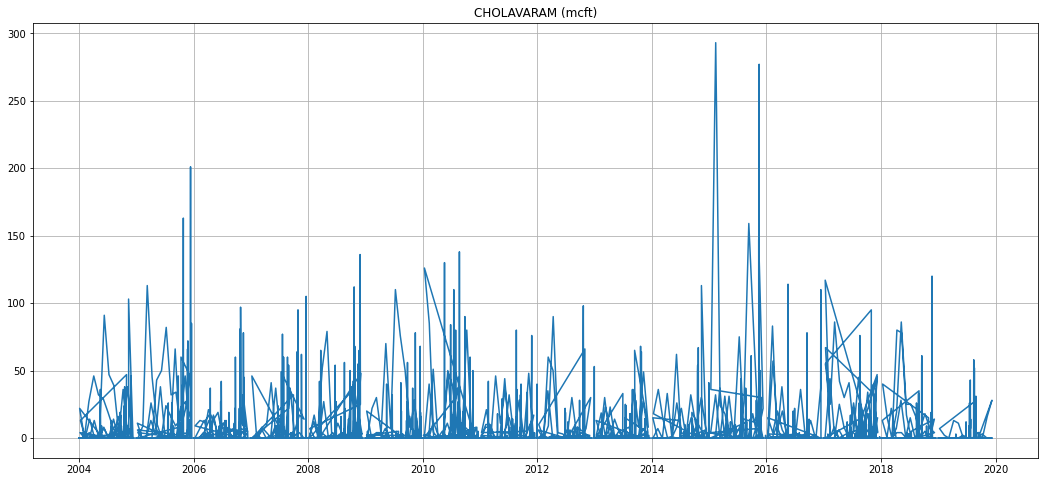

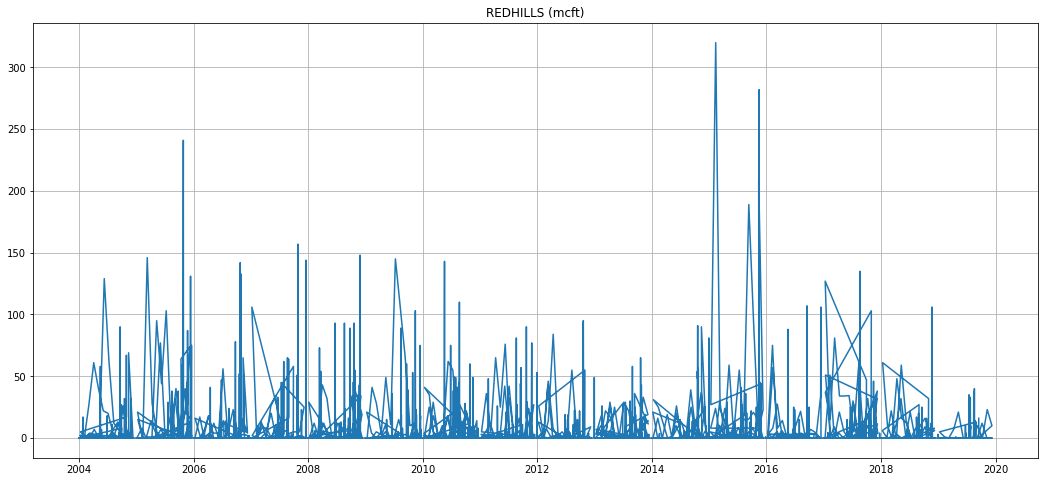

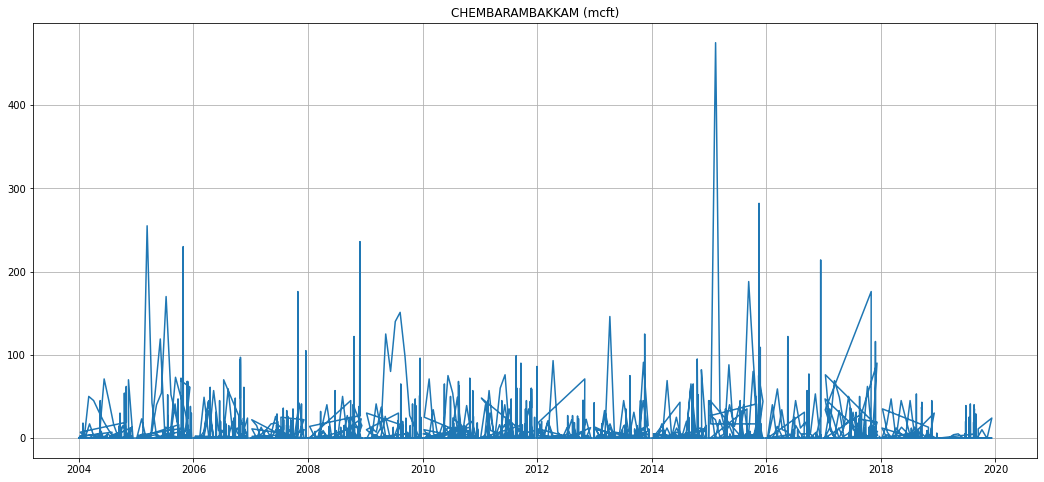

In [ ]:
plt.title("POONDI (mcft)")
plt.plot(chennai_reservoir_levels.index ,poondi)
plt.grid(True)
plt.show()
plt.title("CHOLAVARAM (mcft)")
plt.plot(chennai_reservoir_levels.index ,cholavaram)
plt.grid(True)
plt.show()
plt.title("REDHILLS (mcft)")
plt.plot(chennai_reservoir_levels.index ,redhills)
plt.grid(True)
plt.show()
plt.title("CHEMBARAMBAKKAM (mcft)")
plt.plot(chennai_reservoir_levels.index ,chembarakkam)
plt.grid(True)
plt.show()



*   ### **Trends in Reservior Rainfall from 2004 to 2019 (4 Reserviors)**



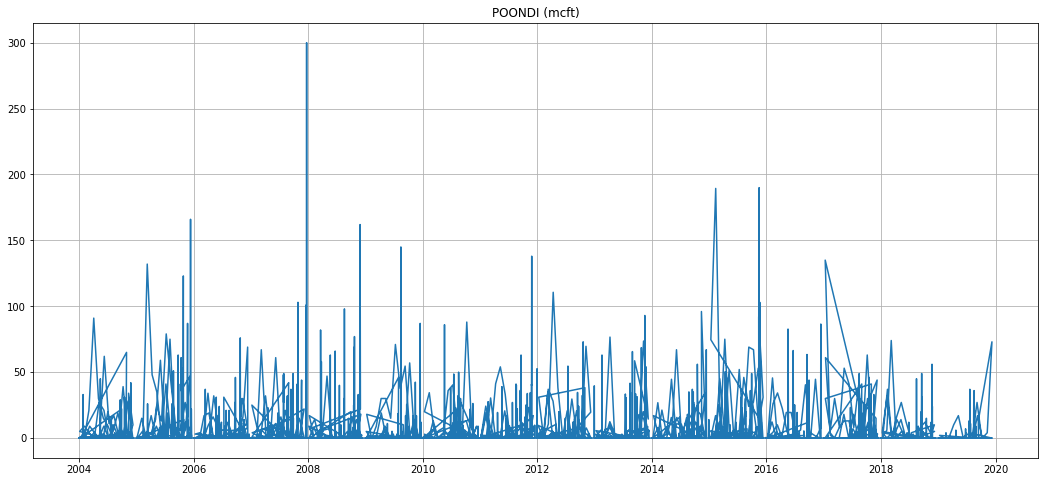

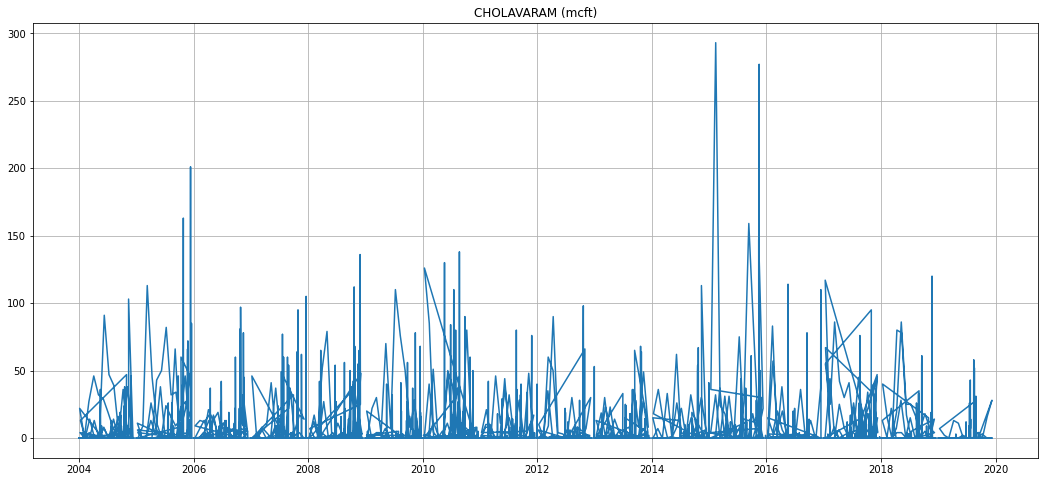

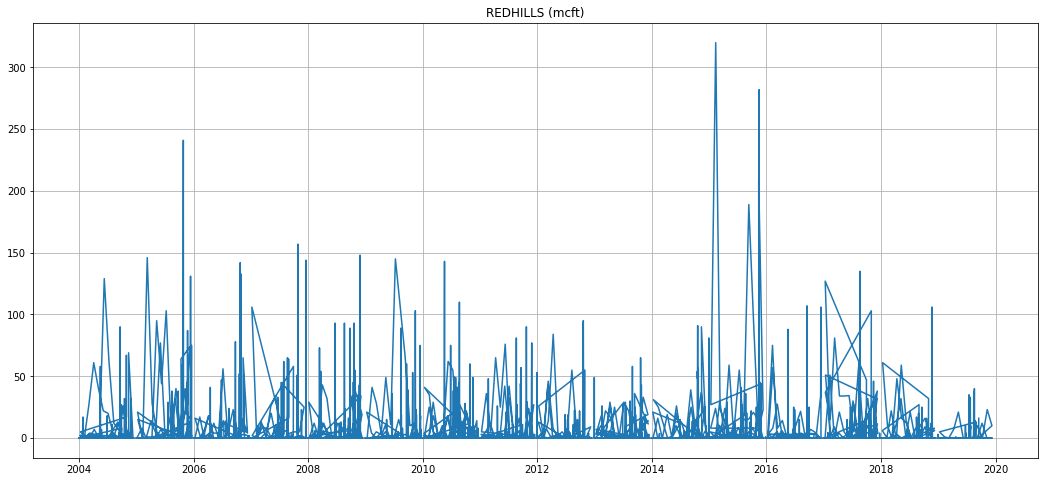

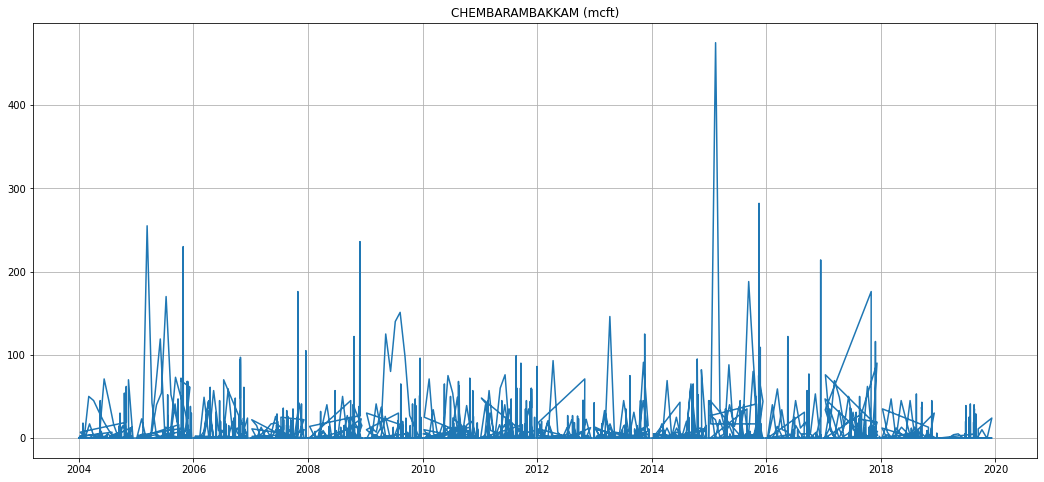

In [ ]:
plt.title("POONDI (mcft)")
plt.plot(chennai_reservoir_rainfall.index ,chennai_reservoir_rainfall["POONDI"])
plt.grid(True)
plt.show()
plt.title("CHOLAVARAM (mcft)")
plt.plot(chennai_reservoir_rainfall.index ,chennai_reservoir_rainfall["CHOLAVARAM"])
plt.grid(True)
plt.show()
plt.title("REDHILLS (mcft)")
plt.plot(chennai_reservoir_rainfall.index ,chennai_reservoir_rainfall["REDHILLS"])
plt.grid(True)
plt.show()
plt.title("CHEMBARAMBAKKAM (mcft)")
plt.plot(chennai_reservoir_rainfall.index ,chennai_reservoir_rainfall["CHEMBARAMBAKKAM"])
plt.grid(True)
plt.show()

*   ### **Trends in Rainfall as a souce to final Reservior**



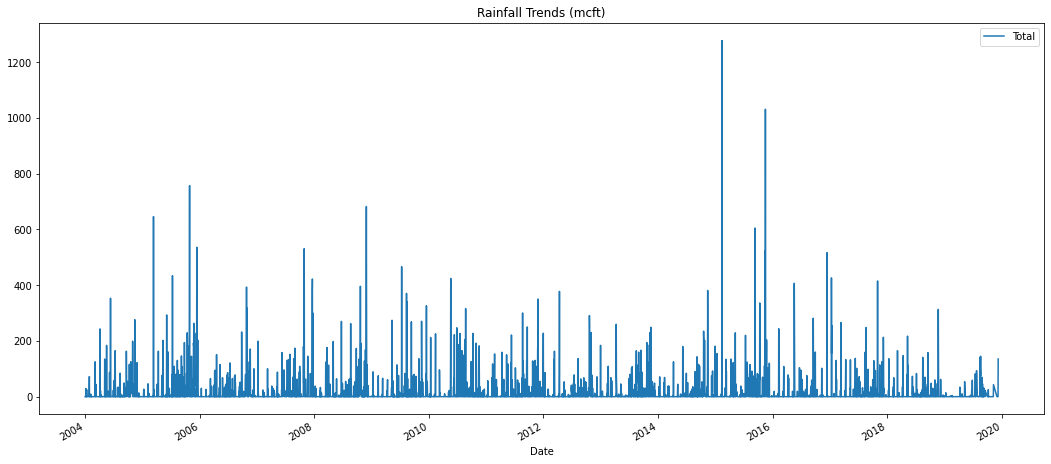

In [ ]:
final_rainfall.plot(title="Rainfall Trends (mcft)")
plt.show()

By observing all the above pictorial representations, we can conclude that there is no trends or stationarity in any of the above datasets.


*   ### **Plotting the dataset to check the stationarity of the data**

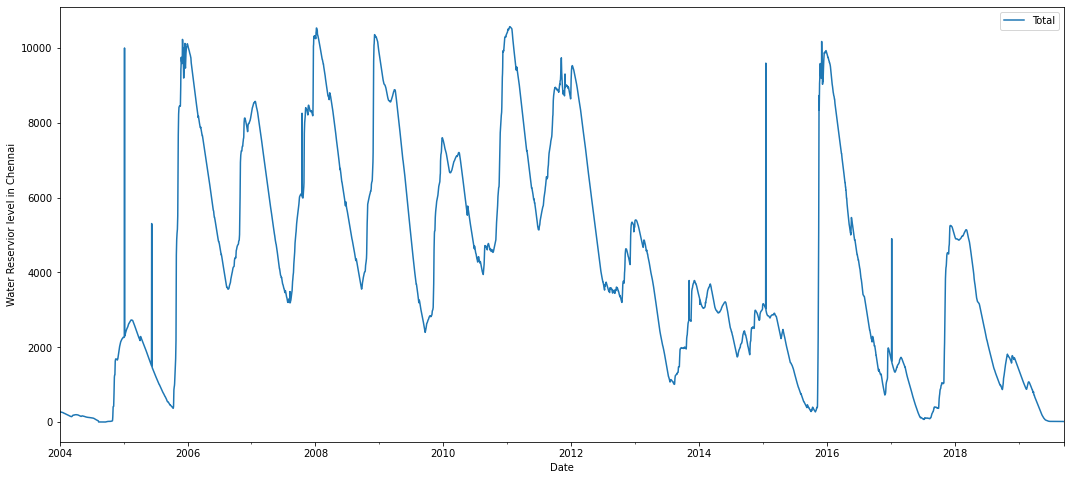

In [ ]:
final_Reservior.plot()
plt.xlabel("Date")
plt.ylabel("Water Reservior level in Chennai")
plt.show()
data = final_Reservior

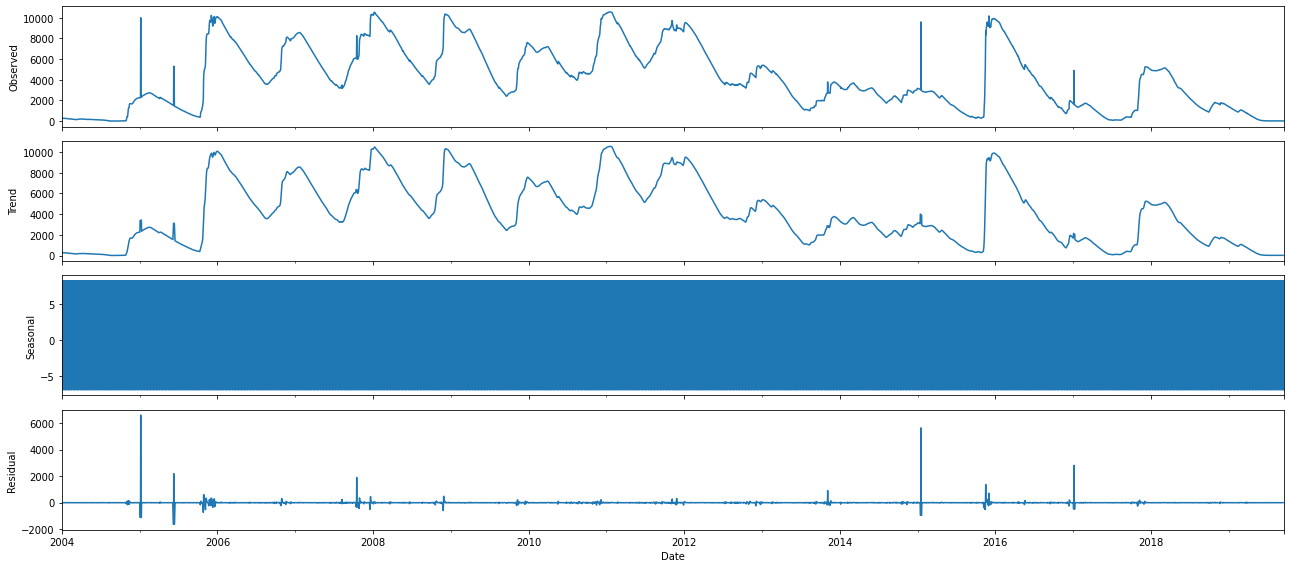

In [ ]:
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(final_Reservior['Total'])
fig = decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def fun(dat):
  res = adfuller(dat)
  lab = ["ADF Test stat","p-Value","Lags","No. of obs"]
  for val,la in zip(res,lab):
    print(la+" : "+str(val))
  if(res[1]<=0.05):
    print("Stationary")
  else:
    print("Non-Stationary")
  print(res)
  print(" **** ")
fun(final_Reservior["Total"])

ADF Test stat : -3.3127444749572583
p-Value : 0.014318318975183333
Lags : 16
No. of obs : 5721
Stationary
(-3.3127444749572583, 0.014318318975183333, 16, 5721, {'1%': -3.431493547724062, '5%': -2.862045338455472, '10%': -2.567038989861576}, 77491.38118163998)
 **** 



*   From the above pictorial and Augmented Dickey Fuller test reults, it was stated that the data is little non-stationary(minimal value) and need to reduce non-stationarity.



*   ## **Making Data Stationary**




In [ ]:
for i in range(1,13):
  print(i,end=" : ")
  final_Reservior["dif_"+str(i)] = final_Reservior["Total"]-final_Reservior["Total"].shift(i)
  fun(final_Reservior["dif_"+str(i)][i:])

1 : ADF Test stat : -14.27652455587264
p-Value : 1.3463317114669637e-26
Lags : 15
No. of obs : 5721
Stationary
(-14.27652455587264, 1.3463317114669637e-26, 15, 5721, {'1%': -3.431493547724062, '5%': -2.862045338455472, '10%': -2.567038989861576}, 77487.84602538569)
 **** 
2 : ADF Test stat : -9.147787085282282
p-Value : 2.7380471983149975e-15
Lags : 34
No. of obs : 5701
Stationary
(-9.147787085282282, 2.7380471983149975e-15, 34, 5701, {'1%': -3.431497561276917, '5%': -2.8620471117187636, '10%': -2.567039933822237}, 77651.63002124631)
 **** 
3 : ADF Test stat : -9.143510536146742
p-Value : 2.8078159103437433e-15
Lags : 33
No. of obs : 5701
Stationary
(-9.143510536146742, 2.8078159103437433e-15, 33, 5701, {'1%': -3.431497561276917, '5%': -2.8620471117187636, '10%': -2.567039933822237}, 77790.03470974289)
 **** 
4 : ADF Test stat : -8.892886294477249
p-Value : 1.2288657761445634e-14
Lags : 33
No. of obs : 5700
Stationary
(-8.892886294477249, 1.2288657761445634e-14, 33, 5700, {'1%': -3.431

From the above result/Observations that condition needed to be as if data is stationary are:


*   ADF Test stat be  ' - ' ve value
*   p-value < 0.05



Hence difference of 1 is sufficient to achieve stationarity(d=1)

Date
2004-01-02    0.0
2004-01-03   -1.0
2004-01-04    0.0
2004-01-05   -0.1
2004-01-06   -1.0
2004-01-07    0.0
Name: dif_1, dtype: float64


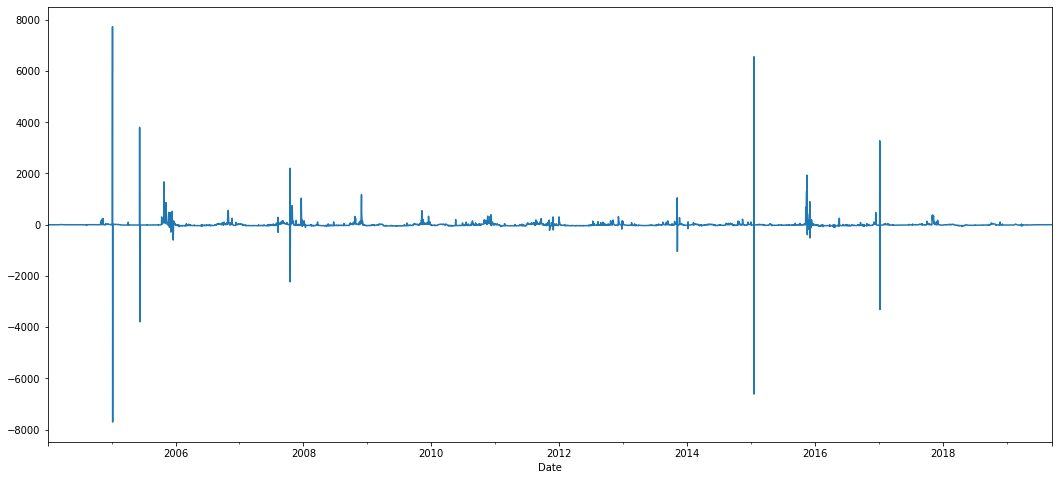

In [ ]:
print(final_Reservior["dif_1"][1:7])
final_Reservior["dif_1"][1:].plot()
plt.show()

Finally the data is stationary as from the observation of the above pictorial representation along with test results and ready to fed.







---


*   ## **Training ML Model**
---







## **ARIMA --- > AR + I + MA**





*   Actually the given data is of Time series , so the best ML model to be fitted on to the data to get the highest accuracy is ARIMA(Auto Regressive Integrated Moving Averages.)
*   And to fed data to the model, the data must be stationary.so, in above code by using the Augmented Dickey Fuller test the stationarity of the data is checked.And futher proceedings are below.










>   ### **AR(p) -->  y(t) = a1.y(t-1)+a2.y(t-2)+ ---+ap.y(t-p)+epsilon(t)**

*   epsilon(t) = white noise at time t.
*   y1,y2,.....,yp = lag terms at respective times upto p value(order).
*   a1,a2,.....,ap = weights shuffled/adjusted during training.








>   ### **MA(q) -->  y(t) = m1.eplsilon(t-1)+m2.eplsilon(t-2)+ ---+ap.eplsilon(t-q)+C**

*   eplison(t) = white noise at time t.
*   epsilon(t-1),epsilon(t-2),.....,epsilon(t-q) = shock terms at respective times upto q value(order).
* c = constant


The Integration parameter was decided from Adfuller test observation from the above module and the value decided be 1

*   Identification of an AR model is often best done with the PACF.
*   Identification of an MA model is often best done with the ACF rather than the PACF.
*   p,d,q - - p -> AR model lags, d -> differencing, q -> MA lags

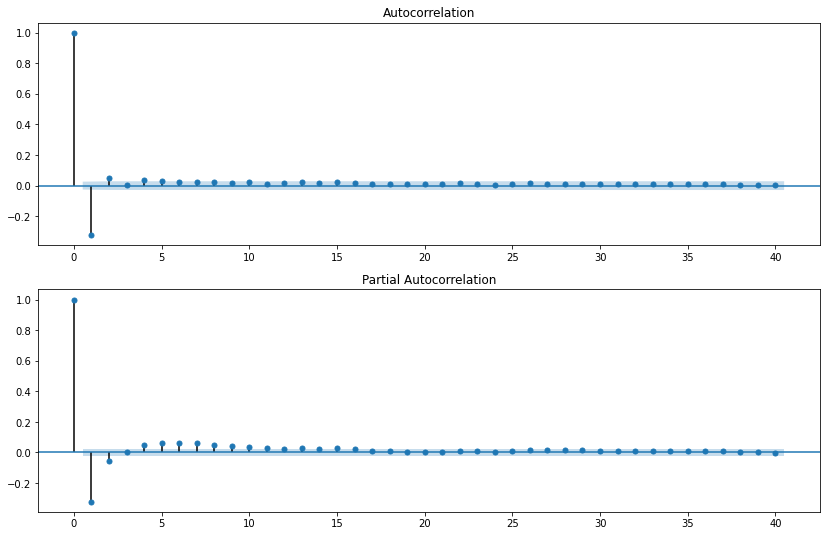

In [ ]:


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(14,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(final_Reservior["dif_1"][1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(final_Reservior["dif_1"][1:],lags=40,ax=ax2)


And another test to find the values of p,q to get a **AIC & BIC** score (Minimum)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
for p in range(1,3):
  for q in range(1,3):
    model = ARIMA(final_Reservior["Total"],order=(p,1,q))
    model_fit = model.fit()
    print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                 5737
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -39014.012
Method:                       css-mle   S.D. of innovations            217.342
Date:                Wed, 20 Apr 2022   AIC                          78036.023
Time:                        15:03:50   BIC                          78062.642
Sample:                    01-02-2004   HQIC                         78045.288
                         - 09-16-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0448      2.050     -0.022      0.983      -4.063       3.974
ar.L1.D.Total    -0.1858      0.036     -5.212      0.000      -0.256      -0.116
ma.L1.D.Total    -0.1528      0.035     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                 5737
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -38946.850
Method:                       css-mle   S.D. of innovations            214.809
Date:                Wed, 20 Apr 2022   AIC                          77903.700
Time:                        15:03:51   BIC                          77936.974
Sample:                    01-02-2004   HQIC                         77915.281
                         - 09-16-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0447      3.998     -0.011      0.991      -7.880       7.790
ar.L1.D.Total     0.9562      0.011     88.413      0.000       0.935       0.977
ma.L1.D.Total    -1.3152      0.015    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                 5737
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -38986.385
Method:                       css-mle   S.D. of innovations            216.295
Date:                Wed, 20 Apr 2022   AIC                          77982.770
Time:                        15:03:53   BIC                          78016.043
Sample:                    01-02-2004   HQIC                         77994.351
                         - 09-16-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0448      4.355     -0.010      0.992      -8.580       8.490
ar.L1.D.Total     0.6300      0.014     44.118      0.000       0.602       0.658
ar.L2.D.Total     0.3386      0.012     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                 5737
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -38946.510
Method:                       css-mle   S.D. of innovations            214.796
Date:                Wed, 20 Apr 2022   AIC                          77905.020
Time:                        15:03:55   BIC                          77944.948
Sample:                    01-02-2004   HQIC                         77918.917
                         - 09-16-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0447      4.058     -0.011      0.991      -7.999       7.909
ar.L1.D.Total     0.9278      0.036     25.772      0.000       0.857       0.998
ar.L2.D.Total     0.0302      0.037     

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model_arima = ARIMA(final_Reservior["Total"],order=(2,1,1)) # p=2,q=1 d=1 values are taken inorder to make data stationary and perform well from above observation 
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Total   No. Observations:                 5737
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -38986.385
Method:                       css-mle   S.D. of innovations            216.295
Date:                Wed, 20 Apr 2022   AIC                          77982.770
Time:                        15:03:57   BIC                          78016.043
Sample:                    01-02-2004   HQIC                         77994.351
                         - 09-16-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0448      4.355     -0.010      0.992      -8.580       8.490
ar.L1.D.Total     0.6300      0.014     44.118      0.000       0.602       0.658
ar.L2.D.Total     0.3386      0.012     27.267      0.000       0.314       0.363
ma.L1.D.Total    -0.9520      0.008   -119.249      0.000      -0.968      -0.936
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0238           +0.0000j            1.0238            0.0000
AR.2           -2.8843           +0.0000j            2.8843            0.5000
MA.1            1.0504           +0.0000j            1.0504            0.0000
-----------------------------------------------------------------------------
"""

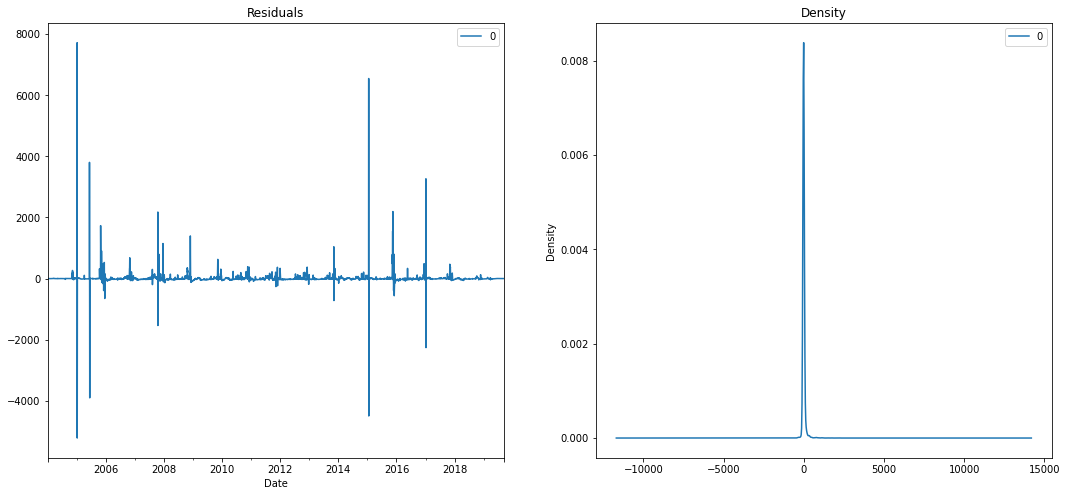

In [ ]:
residuals = pd.DataFrame(model_arima_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
print(len(data))

5738


In [ ]:
pre = model_arima_fit.forecast(steps=1148)[0]
print(len(pre))


1148


In [ ]:
final_Reservior["Total"].head()

Date
2004-01-01    271.9
2004-01-02    271.9
2004-01-03    270.9
2004-01-04    270.9
2004-01-05    270.8
Name: Total, dtype: float64



---

> ### **Accuracy of the Model**






---



In [ ]:
from sklearn.metrics import mean_absolute_error
re = mean_absolute_error(final_Reservior["dif_1"].values[4590:],pre)
print(re)

29.41582641553807



---
*   ## **Conclusion**


---





Now coming to the end part of building an ML model to forecast the future values of availability of water for the Madras city to decrement water crisies as a prevention by fitting **quality data** to an ML Model

*   For the time series data , the best suited ML Model is ARIMA and is used for fitting and predicting the data.
*   And the condition of the stationarity is checked on the data before feeding to the model for a better accuracy.
*   And finallay the accuracy is measured using Mean Absolute Error as 29.415
*   Quality data & choosing model that correctly fitted to the data, plays crucial role in case of accuracy of the result.

Finaly the central theme of the project is **prevention is better than cure** and can be achieved through ML.

                                  ---- Madras-Drinkingwater-level-Prediction ----